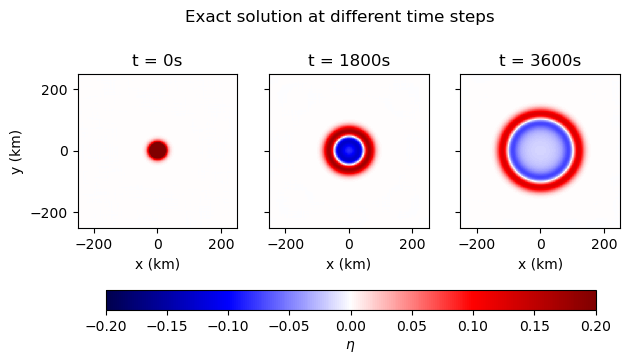

In [1]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import  fftshift,fft2, ifft2, ifftshift
import warnings
warnings.simplefilter('ignore')

# Constants
Lx, Ly = 500000, 500000
ax, ay = 20000, 20000
dx, dy = 2000, 2000
Nx, Ny = Lx/dx, Ly/dy
m = 2
g = 9.81
H = 100

# Domain
x = np.arange(-250000,250000+dx,dx)
y = np.arange(-250000,250000+dx,dy)
x_grid, y_grid = np.meshgrid(x, y)

# Wavenumbers
k=2*np.pi*fftshift(np.fft.fftfreq(len(x), dx))
l=2*np.pi*fftshift(np.fft.fftfreq(len(y), dy))
k_grid, l_grid = np.meshgrid(k,l)

# Dispersion relation
omega = np.sqrt(g*H*(k_grid**2+l_grid**2))

# Initial condition
fxy = np.exp(-(x_grid / ax) ** m) * np.exp(-(y_grid / ay) ** m)
ffxy = fftshift(fft2(fxy))

# Exact solution
time_step = [0,1800,3600]
exact_timestep = np.zeros((3,len(x),len(y)))
exact_solution = np.zeros((3,len(x),len(y)))
for i in range(3):
    exact_timestep[i] = ffxy*np.cos(omega*time_step[i])
    exact_solution[i] = np.real(ifft2(ifftshift(exact_timestep[i])))
    
# Plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(7, 2), sharey=True)

for i, t in enumerate(time_step):
    color_plot = axs[i].pcolormesh(x / 1e3, y / 1e3, exact_solution[i], cmap='seismic', vmin=-0.2, vmax=0.2)
    axs[i].set_title(f't = {t}s')
    axs[i].set_xlabel('x (km)')
    if i == 0:
        axs[i].set_ylabel('y (km)')

# Create a colorbar with a separate axis and position it below the subplots
cbar_ax = fig.add_axes([0.165, -0.3, 0.7, 0.1])
fig.colorbar(color_plot, cax=cbar_ax, orientation='horizontal', label='$\eta$')
plt.suptitle('Exact solution at different time steps', y=1.2)
plt.savefig('exact.jpg', dpi=300) #saving plot
plt.show()

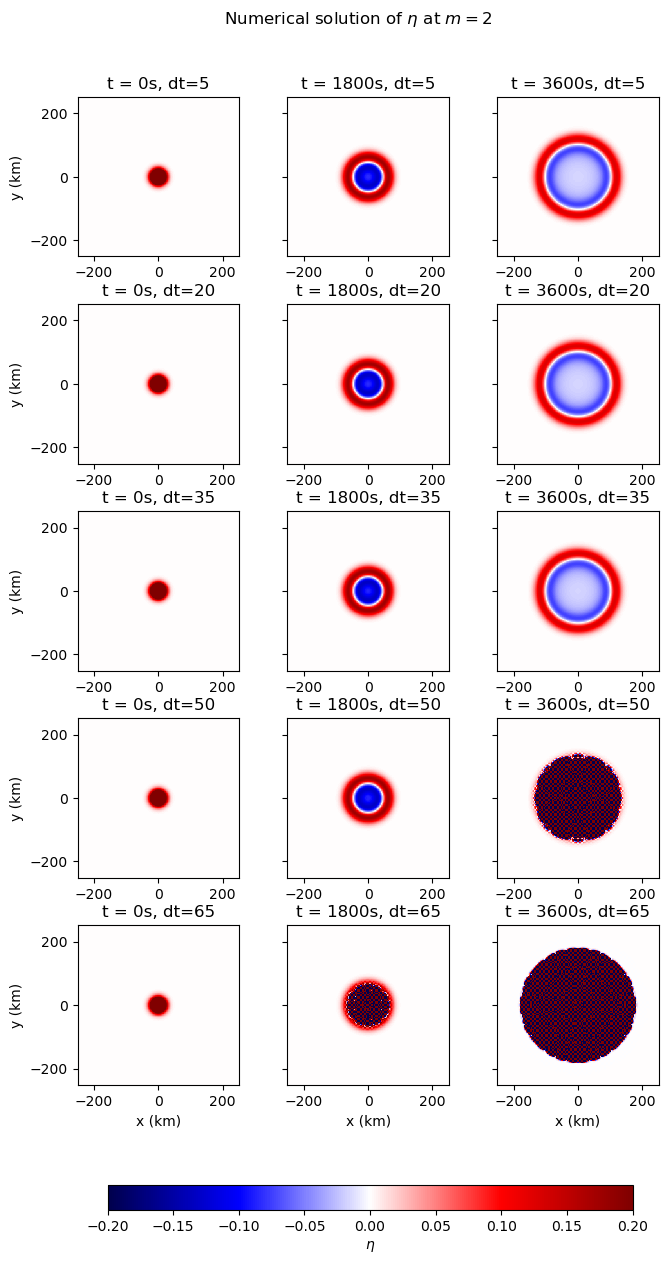

In [2]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift, fft2, ifft2, ifftshift

# Constants
Lx, Ly = 500000, 500000
ax, ay = 20000, 20000
dx, dy = 2000, 2000
Nx, Ny = Lx / dx, Ly / dy
m = 2
g = 9.81
H = 100

# Domain
x = np.arange(-250000, 250000 + dx, dx)
y = np.arange(-250000, 250000 + dx, dy)
x_grid, y_grid = np.meshgrid(x, y)

# Wavenumbers
k = 2 * np.pi * fftshift(np.fft.fftfreq(len(x), dx))
l = 2 * np.pi * fftshift(np.fft.fftfreq(len(y), dy))
k_grid, l_grid = np.meshgrid(k, l)

# Dispersion relation
omega = np.sqrt(g * H * (k_grid ** 2 + l_grid ** 2))

# Initial condition
fxy = np.exp(-(x_grid / ax) ** m) * np.exp(-(y_grid / ay) ** m)
ffxy = fftshift(fft2(fxy))
dt = [5, 20, 35, 50, 65]
num_rows = len(dt)
num_cols = 3
subplot_size = 2.5  # You can change this value for different subplot sizes
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(subplot_size * num_cols, subplot_size * num_rows), sharey=True)
for item in range(len(dt)):
    mu_x = np.sqrt(g * H) * dt[item] / dx
    mu_y = np.sqrt(g * H) * dt[item] / dy
    t = np.arange(0, 3601, dt[item])
    Numerical_solution = np.zeros((len(x), len(y), len(t)))
    Numerical_solution[:, :, 0] = fxy
    Numerical_solution[:, :, 1] = fxy
    
    for n in range(1, len(t) - 1):
        for i in range(1, len(x) - 1):
            for j in range(1, len(y) - 1):
                Numerical_solution[i, j, n + 1] = (
                    2 * Numerical_solution[i, j, n]
                    - Numerical_solution[i, j, n - 1]
                    + mu_x ** 2 * (
                        Numerical_solution[i + 1, j, n]
                        + Numerical_solution[i - 1, j, n]
                        - 2 * Numerical_solution[i, j, n]
                    )
                    + mu_y ** 2 * (
                        Numerical_solution[i, j + 1, n]
                        + Numerical_solution[i, j - 1, n]
                        - 2 * Numerical_solution[i, j, n]
                    )
                )
    
    time_step = [0, 1800, 3600]
    new_dt = dt[item]
    
    for index, data in enumerate(time_step):
        color_plot = axs[item, index].pcolormesh(x / 1e3, y / 1e3, Numerical_solution[:,:, int(data/new_dt)], 
                                   cmap='seismic', vmin=-0.2, vmax=0.2)
        axs[item, index].set_title(f't = {data}s, dt={new_dt}')
        if index == 0:
            axs[item, index].set_ylabel('y (km)')
        if item == 4:
            axs[item, index].set_xlabel('x (km)')

# Create a colorbar with a separate axis and position it below the subplots
cbar_ax = fig.add_axes([0.165, 0.01, 0.7, 0.02])
fig.colorbar(color_plot, cax=cbar_ax, orientation='horizontal', label='$\eta$')
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.9) # Adjust the top value to create more space
plt.suptitle('Numerical solution of $\eta$ at $m=2$', y=0.97) # Increase the y value to move the title upwards
plt.savefig('m2.jpg', dpi=300, bbox_inches='tight')  # Add bbox_inches='tight'
plt.show()

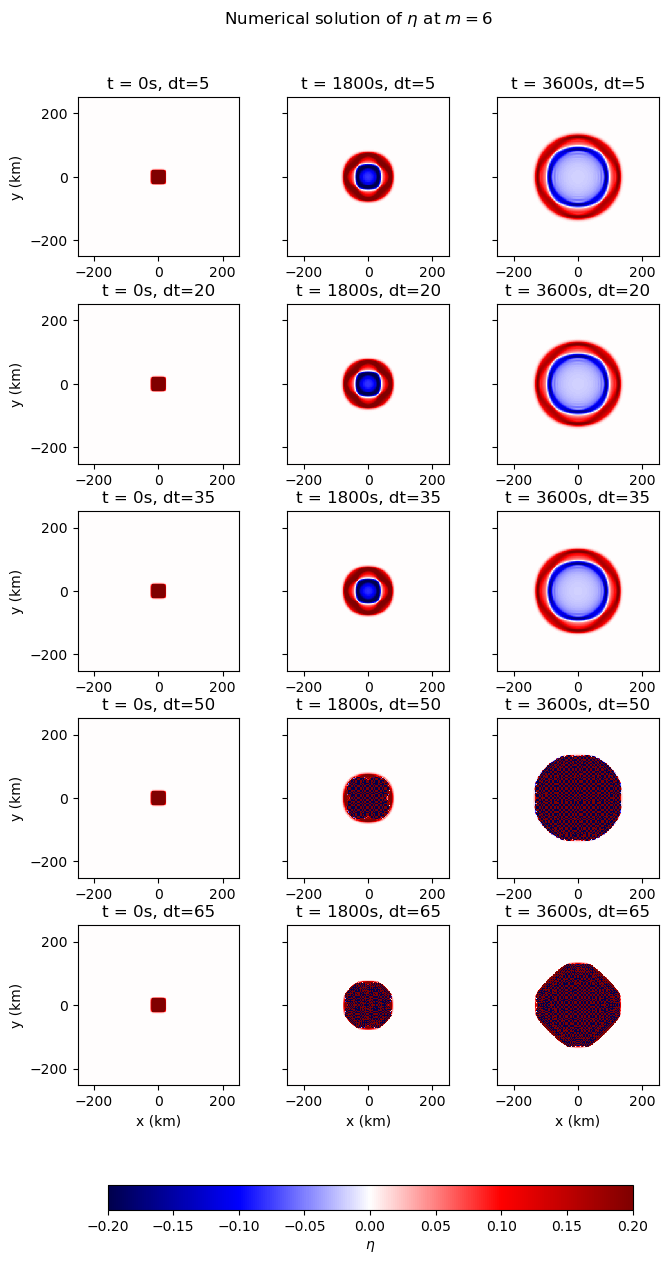

In [3]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift, fft2, ifft2, ifftshift

# Constants
Lx, Ly = 500000, 500000
ax, ay = 20000, 20000
dx, dy = 2000, 2000
Nx, Ny = Lx / dx, Ly / dy
m = 6
g = 9.81
H = 100

# Domain
x = np.arange(-250000, 250000 + dx, dx)
y = np.arange(-250000, 250000 + dx, dy)
x_grid, y_grid = np.meshgrid(x, y)

# Wavenumbers
k = 2 * np.pi * fftshift(np.fft.fftfreq(len(x), dx))
l = 2 * np.pi * fftshift(np.fft.fftfreq(len(y), dy))
k_grid, l_grid = np.meshgrid(k, l)

# Dispersion relation
omega = np.sqrt(g * H * (k_grid ** 2 + l_grid ** 2))

# Initial condition
fxy = np.exp(-(x_grid / ax) ** m) * np.exp(-(y_grid / ay) ** m)
ffxy = fftshift(fft2(fxy))
dt = [5, 20, 35, 50, 65]
num_rows = len(dt)
num_cols = 3
subplot_size = 2.5  # You can change this value for different subplot sizes
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(subplot_size * num_cols, subplot_size * num_rows), sharey=True)
for item in range(len(dt)):
    mu_x = np.sqrt(g * H) * dt[item] / dx
    mu_y = np.sqrt(g * H) * dt[item] / dy
    t = np.arange(0, 3601, dt[item])
    Numerical_solution = np.zeros((len(x), len(y), len(t)))
    Numerical_solution[:, :, 0] = fxy
    Numerical_solution[:, :, 1] = fxy
    
    for n in range(1, len(t) - 1):
        for i in range(1, len(x) - 1):
            for j in range(1, len(y) - 1):
                Numerical_solution[i, j, n + 1] = (
                    2 * Numerical_solution[i, j, n]
                    - Numerical_solution[i, j, n - 1]
                    + mu_x ** 2 * (
                        Numerical_solution[i + 1, j, n]
                        + Numerical_solution[i - 1, j, n]
                        - 2 * Numerical_solution[i, j, n]
                    )
                    + mu_y ** 2 * (
                        Numerical_solution[i, j + 1, n]
                        + Numerical_solution[i, j - 1, n]
                        - 2 * Numerical_solution[i, j, n]
                    )
                )
    
    time_step = [0, 1800, 3600]
    new_dt = dt[item]
    
    for index, data in enumerate(time_step):
        color_plot = axs[item, index].pcolormesh(x / 1e3, y / 1e3, Numerical_solution[:,:, int(data/new_dt)], 
                                   cmap='seismic', vmin=-0.2, vmax=0.2)
        axs[item, index].set_title(f't = {data}s, dt={new_dt}')
        if index == 0:
            axs[item, index].set_ylabel('y (km)')
        if item == 4:
            axs[item, index].set_xlabel('x (km)')

# Create a colorbar with a separate axis and position it below the subplots
cbar_ax = fig.add_axes([0.165, 0.01, 0.7, 0.02])
fig.colorbar(color_plot, cax=cbar_ax, orientation='horizontal', label='$\eta$')
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.9) # Adjust the top value to create more space
plt.suptitle('Numerical solution of $\eta$ at $m=6$', y=0.97) # Increase the y value to move the title upwards
plt.savefig('m6.jpg', dpi=300, bbox_inches='tight')  # Add bbox_inches='tight'
plt.show()

In [6]:
def FDCS_AN(dx,dy,dt,m,ffxy,X,Y,g=9.81,H =100):
    
    T = int(3600/dt)
    T_var = np.arange(0,3601,dt)
    x = np.arange(-250000, 250000 + dx, dx)
    y = np.arange(-250000, 250000 + dx, dy)
    Eta_ana = np.zeros((T,len(X),len(Y)))
    FEta_ts = np.zeros((T,len(X),len(Y)))
    for i in range(T):
        FEta_ts[i] = ffxy*np.cos(omega*T_var[i])
        Eta_ana[i] = np.real(ifft2(ifftshift(FEta_ts[i])))
    
    CFL_x = np.sqrt(g*H)*dt/dx
    CFL_y = np.sqrt(g*H)*dt/dy

    
    eta_FD = np.zeros((len(x), len(y), T))
    eta_FD[:, :, 0] = Eta_ana[0]
    eta_FD[:, :, 1] = Eta_ana[0]
    for n in range(1, T-1):
        for i in range(1, len(X)-1):
            for j in range(1, len(Y)-1):
                eta_FD[i,j, n+1] = 2 * eta_FD[i, j, n] - eta_FD[i,j, n-1] + CFL_x**2 * (eta_FD[i+1, j,n] + eta_FD[i-1, j,n] - 2 * eta_FD[i,j, n]) + CFL_y**2 * (eta_FD[i, j+1 ,n] + eta_FD[i, j-1 ,n] - 2 * eta_FD[i, j, n])
    return Eta_ana, eta_FD
m1 = 2
m2 = 6
fxy = np.exp(-(x_grid / ax) * m1) * np.exp(-(y_grid / ay) * m1)
fxyy = np.exp(-(x_grid / ax) * m2) * np.exp(-(y_grid / ay) * m2)
ffxy = fftshift(fft2(fxy))
ffxyy = fftshift(fft2(fxyy))

Eta_ana_5 , eta_FD_5 = FDCS_AN(dx,dy,5,m1,ffxy,x,y,g=9.81,H =100)
Eta_ana_20 , eta_FD_20 = FDCS_AN(dx,dy,20,m1,ffxy,x,y,g=9.81,H =100)
Eta_ana_35 , eta_FD_35 = FDCS_AN(dx,dy,35,m1,ffxy,x,y,g=9.81,H =100)
Eta_ana_50 , eta_FD_50 = FDCS_AN(dx,dy,50,m1,ffxy,x,y,g=9.81,H =100)
Eta_ana_65 , eta_FD_65 = FDCS_AN(dx,dy,65,m1,ffxy,x,y,g=9.81,H =100)

Eta_ana_5_ , eta_FD_5_ = FDCS_AN(dx,dy,5,m2,ffxy,x,y,g=9.81,H =100)
Eta_ana_20_ , eta_FD_20_ = FDCS_AN(dx,dy,20,m2,ffxy,x,y,g=9.81,H =100)
Eta_ana_35_ , eta_FD_35_ = FDCS_AN(dx,dy,35,m2,ffxy,x,y,g=9.81,H =100)
Eta_ana_50_ , eta_FD_50_ = FDCS_AN(dx,dy,50,m2,ffxy,x,y,g=9.81,H =100)
Eta_ana_65_ , eta_FD_65_ = FDCS_AN(dx,dy,65,m2,ffxy,x,y,g=9.81,H =100)


In [46]:
def l2_norm_error(dt, eta_FD, Eta_ana):
    T_steps = np.arange(0, 3600, dt)
    l2_error = np.zeros(len(T_steps))
    
    for i in range(min(eta_FD.shape[2], Eta_ana.shape[0])):
        #l2_error[i] = np.sqrt(np.sum((eta_FD[:, :, i] - Eta_ana[i])**2))
        l2_error[i] = np.linalg.norm((eta_FD[:, :, i] - Eta_ana[i]))
    
    return l2_error

# Compute L2 norm errors for each dt value
l2_error_5 = l2_norm_error(5, eta_FD_5, Eta_ana_5)
l2_error_20 = l2_norm_error(20, eta_FD_20, Eta_ana_20)
l2_error_35 = l2_norm_error(35, eta_FD_35, Eta_ana_35)
l2_error_50 = l2_norm_error(50, eta_FD_50, Eta_ana_50)
l2_error_65 = l2_norm_error(65, eta_FD_65, Eta_ana_65)
l2_error_5_ = l2_norm_error(5, eta_FD_5_, Eta_ana_5_)
l2_error_20_ = l2_norm_error(20, eta_FD_20_, Eta_ana_20_)
l2_error_35_ = l2_norm_error(35, eta_FD_35_, Eta_ana_35_)
l2_error_50_ = l2_norm_error(50, eta_FD_50_, Eta_ana_50_)
l2_error_65_ = l2_norm_error(65, eta_FD_65_, Eta_ana_65_)

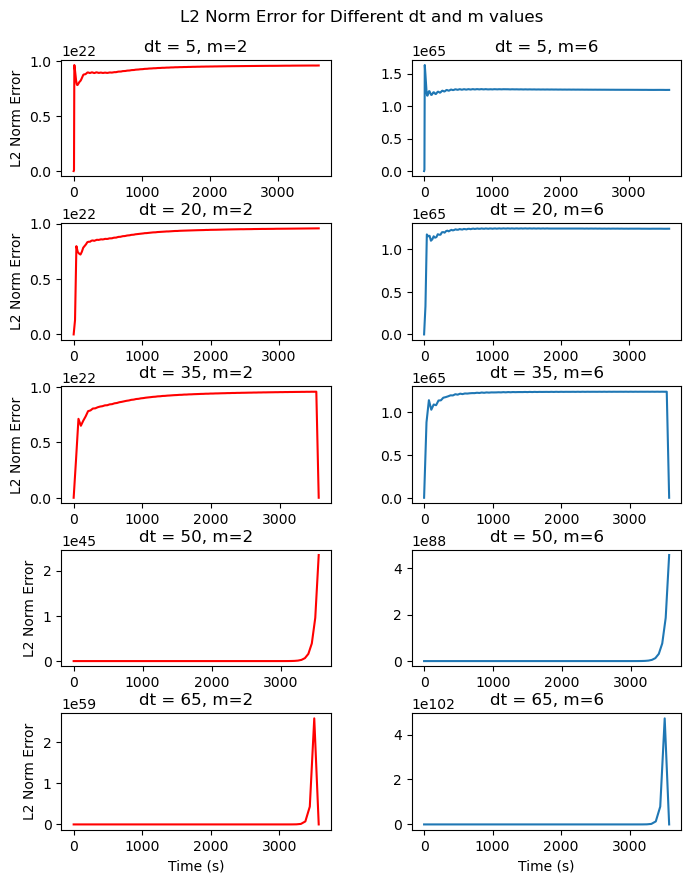

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined the l2_norm_error function and calculated the errors (l2_error_5, l2_error_20, ...)

dt_values = [5, 20, 35, 50, 65]
l2_errors_m2 = [l2_error_5, l2_error_20, l2_error_35, l2_error_50, l2_error_65]
l2_errors_m6 = [l2_error_5_, l2_error_20_, l2_error_35_, l2_error_50_, l2_error_65_]

fig, axs = plt.subplots(5, 2, figsize=(8, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjust space between subplots
fig.suptitle('L2 Norm Error for Different dt and m values', y=0.93)

for i, dt in enumerate(dt_values):
    axs[i, 0].plot(np.arange(0, 3600, dt), l2_errors_m2[i], 'r', label=f'dt = {dt}, m=2')  # Red color for m=2
    axs[i, 0].set_title(f'dt = {dt}, m=2')
    axs[i, 1].plot(np.arange(0, 3600, dt), l2_errors_m6[i], label=f'dt = {dt}, m=6')
    axs[i, 1].set_title(f'dt = {dt}, m=6')
    axs[i, 0].set_ylabel('L2 Norm Error')
    if i == 4:
        axs[i, 0].set_xlabel('Time (s)')
        axs[i, 1].set_xlabel('Time (s)')

plt.savefig('picc.jpg', dpi=300, bbox_inches='tight')  # Add bbox_inches='tight'
plt.show()

In [ ]:
Eta_ana_20_ , eta_FD_20_ = FDCS_AN(dx,dy,20,m2,ffxy,x,y,g=9.81,H =100)

In [ ]:
#fxy = np.exp(-(x_grid / ax) * m1) * np.exp(-(y_grid / ay) * m1)
fxyy = np.exp(-(x_grid / ax) * m2) * np.exp(-(y_grid / ay) * m2)
ffxyy = fftshift(fft2(fxyy))

Eta_ana_5_ , eta_FD_5_ = FDCS_AN(dx,dy,5,m2,ffxyy,x,y,g=9.81,H =100)

In [ ]:
Eta_ana_20_ , eta_FD_20_ = FDCS_AN(dx,dy,20,m2,ffxyy,x,y,g=9.81,H =100)

In [ ]:
Eta_ana_35_ , eta_FD_35_ = FDCS_AN(dx,dy,35,m2,ffxyy,x,y,g=9.81,H =100)


In [ ]:
Eta_ana_50_ , eta_FD_50_ = FDCS_AN(dx,dy,50,m2,ffxyy,x,y,g=9.81,H =100)


In [ ]:
Eta_ana_65_ , eta_FD_65_ = FDCS_AN(dx,dy,65,m2,ffxyy,x,y,g=9.81,H =100)


In [ ]:
Eta_ana_5_ 

array([[[ 1.39370958e+65,  3.82442018e+64,  2.09888629e+64, ...,
          1.15189322e+64,  2.09888629e+64,  3.82442018e+64],
        [ 3.82442018e+64,  2.09888629e+64,  1.15189322e+64, ...,
          1.94654366e+47,  1.21619786e+48,  2.98856161e+48],
        [ 2.09888629e+64,  1.15189322e+64,  6.32172403e+63, ...,
         -6.04468040e+47,  5.29091430e+47,  1.75502311e+48],
        ...,
        [ 1.15189322e+64, -5.07162896e+47, -6.75553737e+47, ...,
          1.90406669e+63,  3.46943571e+63,  6.32172403e+63],
        [ 2.09888629e+64,  1.75502311e+48,  5.29091430e+47, ...,
          3.46943571e+63,  6.32172403e+63,  1.15189322e+64],
        [ 3.82442018e+64,  2.98856161e+48,  1.21619786e+48, ...,
          6.32172403e+63,  1.15189322e+64,  2.09888629e+64]],

       [[ 1.37401155e+65,  3.85056909e+64,  2.07337628e+64, ...,
          1.15090601e+64,  2.07337628e+64,  3.85056909e+64],
        [ 3.85056909e+64,  2.11597733e+64,  1.15540028e+64, ...,
          8.25083703e+61,  6.66488568e

In [ ]:
l2

array([[[ 5.18470553e+21,  2.12243893e+21,  1.73770602e+21, ...,
          1.42271336e+21,  1.73770602e+21,  2.12243893e+21],
        [ 2.12243893e+21,  1.73770602e+21,  1.42271336e+21, ...,
         -2.11961121e+04,  2.02989668e+04,  2.74026013e+05],
        [ 1.73770602e+21,  1.42271336e+21,  1.16481918e+21, ...,
         -2.58819670e+04,  1.23750939e+04,  1.44597716e+05],
        ...,
        [ 1.42271336e+21,  6.69623404e+04,  1.08970223e+05, ...,
          7.80801648e+20,  9.53673286e+20,  1.16481918e+21],
        [ 1.73770602e+21,  1.44597716e+05,  1.23750939e+04, ...,
          9.53673286e+20,  1.16481918e+21,  1.42271336e+21],
        [ 2.12243893e+21,  2.74026013e+05,  2.02989668e+04, ...,
          1.16481918e+21,  1.42271336e+21,  1.73770602e+21]],

       [[ 5.12445200e+21,  2.12696803e+21,  1.72357740e+21, ...,
          1.41651018e+21,  1.72357740e+21,  2.12696803e+21],
        [ 2.12696803e+21,  1.74343958e+21,  1.42415652e+21, ...,
          8.36212471e+18,  6.58205250e

In [ ]:
l2_error_5

array([0.00000000e+00, 8.54752689e+19, 9.65287703e+21, 9.43500065e+21,
       9.16049464e+21, 8.85713517e+21, 8.55563790e+21, 8.28546321e+21,
       8.07014652e+21, 7.92325483e+21, 7.84640867e+21, 7.83030775e+21,
       7.85841567e+21, 7.91181151e+21, 7.97353758e+21, 8.03143919e+21,
       8.07929618e+21, 8.11652558e+21, 8.14688065e+21, 8.17656500e+21,
       8.21215658e+21, 8.25872782e+21, 8.31851561e+21, 8.39038674e+21,
       8.47015600e+21, 8.55160184e+21, 8.62787271e+21, 8.69293301e+21,
       8.74274701e+21, 8.77599670e+21, 8.79423211e+21, 8.80144755e+21,
       8.80316757e+21, 8.80521878e+21, 8.81244545e+21, 8.82766741e+21,
       8.85114088e+21, 8.88065661e+21, 8.91223061e+21, 8.94118078e+21,
       8.96329708e+21, 8.97582151e+21, 8.97803229e+21, 8.97133447e+21,
       8.95886847e+21, 8.94474278e+21, 8.93307171e+21, 8.92704144e+21,
       8.92822360e+21, 8.93629555e+21, 8.94922016e+21, 8.96381808e+21,
       8.97657190e+21, 8.98446098e+21, 8.98564062e+21, 8.97983129e+21,
      

In [ ]:
l2_error_5_

array([0.00000000e+00, 2.21713509e+63, 1.63359725e+65, 1.56672654e+65,
       1.48347669e+65, 1.39344626e+65, 1.30750773e+65, 1.23614401e+65,
       1.18712329e+65, 1.16325482e+65, 1.16162875e+65, 1.17510346e+65,
       1.19511406e+65, 1.21416364e+65, 1.22716477e+65, 1.23174987e+65,
       1.22797169e+65, 1.21771428e+65, 1.20397997e+65, 1.19013593e+65,
       1.17919244e+65, 1.17321130e+65, 1.17295823e+65, 1.17787573e+65,
       1.18635981e+65, 1.19623122e+65, 1.20525573e+65, 1.21159662e+65,
       1.21413602e+65, 1.21264235e+65, 1.20777802e+65, 1.20094631e+65,
       1.19398690e+65, 1.18875734e+65, 1.18668260e+65, 1.18839391e+65,
       1.19357582e+65, 1.20107774e+65, 1.20924961e+65, 1.21638561e+65,
       1.22114282e+65, 1.22283460e+65, 1.22154827e+65, 1.21808020e+65,
       1.21371354e+65, 1.20989073e+65, 1.20785635e+65, 1.20835961e+65,
       1.21149513e+65, 1.21672078e+65, 1.22303428e+65, 1.22924380e+65,
       1.23425219e+65, 1.23728832e+65, 1.23804677e+65, 1.23672312e+65,
      